**Pandas Homework - Option 2: Academy of Py** 

As a first task, you've been asked to analyze the district-wide standardized test results. You'll be given access to every student's math and reading scores, as well as various information on the schools they attend. Your responsibility is to aggregate the data to and showcase obvious trends in school performance.

In [134]:
import pandas as pd
import numpy as np

In [135]:
#could change to an input variable for future files to run, but hard code for now
school_file_name = 'schools_complete.csv' #input('What is the name of the school file? (make sure it is saved to raw_data folder)\n')
student_file_name = 'students_complete.csv' #input('What is the name of the student file? (make sure it is saved to raw_data folder)\n')

school_data_path = 'raw_data\\' + school_file_name
student_data_path = 'raw_data\\' + student_file_name

df_school = pd.read_csv(school_data_path)
df_student = pd.read_csv(student_data_path)

In [136]:
print(df_school.shape)
df_school.head()

(15, 5)


,School ID,name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500


In [137]:
print(df_student.shape)
print(len(df_student['Student ID'].unique()))
df_student.head()

(39170, 7)
39170


,Student ID,name,gender,grade,school,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


In [138]:
df_school.rename(columns={'name':'school'}, inplace=True)

df = pd.merge(df_school, df_student, how='inner', on='school')

In [139]:
print(df.shape)
df.head()

(39170, 11)


,School ID,school,type,size,budget,Student ID,name,gender,grade,reading_score,math_score
0,0,Huang High School,District,2917,1910635,0,Paul Bradley,M,9th,66,79
1,0,Huang High School,District,2917,1910635,1,Victor Smith,M,12th,94,61
2,0,Huang High School,District,2917,1910635,2,Kevin Rodriguez,M,12th,90,60
3,0,Huang High School,District,2917,1910635,3,Dr. Richard Scott,M,12th,67,58
4,0,Huang High School,District,2917,1910635,4,Bonnie Ray,F,9th,97,84


### District Summary

In [140]:
total_schools = len(df.school.unique())
total_students = len(df['Student ID'].unique())
total_budget = df_school.budget.sum()
average_math_score = df.math_score.mean()
average_reading_score = df.reading_score.mean()

#create pass/fail column for both math and reading in df
#assuming a 70% is passing
df['math_pass'] = df.math_score.map(lambda x: 'pass' if x >= 70 else 'fail')
df['reading_pass'] = df.reading_score.map(lambda x: 'pass' if x >= 70 else 'fail')

percent_math_pass = df.math_pass.value_counts()['pass'] / total_students * 100
percent_reading_pass = df.reading_pass.value_counts()['pass'] / total_students * 100
percent_pass_average = np.mean([percent_math_pass, percent_reading_pass])

In [141]:
#create dataframe with a tuple of row values and column labels list so df ordered how we want
district_summ_col_labels = ['Total Schools',
                            'Total Students',
                            'Total Budget',
                            'Average Math Score',
                            'Average Reading Score',
                            '% Passing Math',
                            '% Passing Reading',
                            '% Overall Passing Rate']

#the formatting is embedded on entry - this does change them to string values
district_summ_values = [(total_schools,
                       '{:,}'.format(total_students),
                       '${:,}'.format(total_budget),
                       '{:.1f}'.format(average_math_score),
                       '{:.1f}'.format(average_reading_score),
                       '{:.2f}%'.format(percent_math_pass),
                       '{:.2f}%'.format(percent_reading_pass),
                       '{:.2f}%'.format(percent_pass_average))]

df_district_summ = pd.DataFrame(data=district_summ_values,
                                columns=district_summ_col_labels)

df_district_summ

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
0,15,"39,170","$24,649,428",79.0,81.9,74.98%,85.81%,80.39%


### School Summary

In [142]:
df.head(2)

,School ID,school,type,size,budget,Student ID,name,gender,grade,reading_score,math_score,math_pass,reading_pass
0,0,Huang High School,District,2917,1910635,0,Paul Bradley,M,9th,66,79,pass,fail
1,0,Huang High School,District,2917,1910635,1,Victor Smith,M,12th,94,61,fail,pass


In [143]:
#can put groupby methods in quotes to reference them
df_school_summ = df.groupby('school').agg({'type': 'first', #School Type
                         'size': 'first', #Total Students 
                         'budget': 'first', #Total School Budget
                         #'', #Per Student Budget
                         'math_score': 'mean', #Average Math Score
                         'reading_score': 'mean' #Average Reading Score
                         #'', #% Passing Math
                         #'', #%Passing Reading 
                         #'', #Overall Passing Rate (avg of two) 
                         }).rename(columns={'type': 'School Type',
                                    'size': 'Total Students',
                                    'budget': 'Total School Budget',
                                    'math_score': 'Average Math Score',
                                    'reading_score': 'Average Reading Score'})

df_school_summ.head(2)                      

,School Type,Total Students,Total School Budget,Average Math Score,Average Reading Score
school,,,,,
Bailey High School,District,4976,3124928,77.048432,81.033963
Cabrera High School,Charter,1858,1081356,83.061895,83.975780


In [144]:
#df.insert(loc=idx, column='A', value=new_col)
df_school_summ.insert(loc=3, column='Per Student Budget', 
                      value= df_school_summ['Total School Budget'] / df_school_summ['Total Students'])

df_school_summ.head(2)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score
school,,,,,,
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780


In [145]:
##note: could use the .unstack(level=-1) method here too in order to get a pass and fail column and
##then just insert that pass column into the df

#for math and reading pass rate, first groupby school, then just get the column for pass/fail
#then use value_counts and set normalize = True so that gets percent value
#make sure to set sort=False for value_counts so always arranges alphabetically fail then pass for each school grouping
#the output is fail and pass score for each school, we only want pass rate so from this series
#select only every other value (starting on the 1st index) to then insert into the df_school_summ columns
#multiply by 100 to get it to common percentage viewing form
math_pass_grp = df.groupby('school')['math_pass']
math_pass_school = math_pass_grp.value_counts(sort=False, normalize=True)[1::2] * 100
#print(math_pass_school) #temporary check
df_school_summ['% Passing Math'] = list(math_pass_school)

reading_pass_grp = df.groupby('school')['reading_pass']
reading_pass_school = reading_pass_grp.value_counts(sort=False, normalize=True)[1::2] * 100
#print(reading_pass_school) #temporary check
df_school_summ['% Passing Reading'] = list(reading_pass_school)

df_school_summ['% Overall Passing Rate'] = df_school_summ[['% Passing Math', '% Passing Reading']].mean(axis=1)

df_school_summ.head(2)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
school,,,,,,,,,
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,74.306672
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,95.586652


In [146]:
##dataframe formatting for output

#can round the long decimals to 2 values for readability - note this format does oddly cut off trailing zeros
#also this formatting permanently rounds number, not just visually, so lose precision if need it
# df_school_summ[['Average Math Score', 'Average Reading Score']] = df_school_summ[
#                 ['Average Math Score', 'Average Reading Score']].applymap(lambda x: round(x, 2))
# df_school_summ[['% Passing Math', '% Passing Reading', '% Overall Passing Rate']] = df_school_summ[
#                 ['% Passing Math', '% Passing Reading', '% Overall Passing Rate']].applymap(lambda x: round(x, 2))

##temporarily format the style of the whole data table, so can use the numbers later
df_school_summ.style.format({'Total Students': '{:,}'.format,
                              'Total School Budget': '${:,}'.format,
                              'Per Student Budget': '${:.2f}'.format,
                              'Average Math Score': '{:.1f}'.format,
                              'Average Reading Score': '{:.1f}'.format,
                              '% Passing Math': '{:.2f}%'.format,
                              '% Passing Reading': '{:.2f}%'.format,
                              '% Overall Passing Rate': '{:.2f}%'.format,})
#these formatting options below would permanently change values to a string
# df_school_summ['Total Students'] = df_school_summ['Total Students'].apply('{:,}'.format)
# df_school_summ['Total School Budget'] = df_school_summ['Total School Budget'].apply('${:,}'.format)
# df_school_summ['Per Student Budget'] = df_school_summ['Per Student Budget'].apply('${:.2f}'.format)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
school,,,,,,,,,
Bailey High School,District,"4,976","$3,124,928",$628.00,77.0,81.0,66.68%,81.93%,74.31%
Cabrera High School,Charter,"1,858","$1,081,356",$582.00,83.1,84.0,94.13%,97.04%,95.59%
Figueroa High School,District,"2,949","$1,884,411",$639.00,76.7,81.2,65.99%,80.74%,73.36%
Ford High School,District,"2,739","$1,763,916",$644.00,77.1,80.7,68.31%,79.30%,73.80%
Griffin High School,Charter,"1,468","$917,500",$625.00,83.4,83.8,93.39%,97.14%,95.27%
Hernandez High School,District,"4,635","$3,022,020",$652.00,77.3,80.9,66.75%,80.86%,73.81%
Holden High School,Charter,427,"$248,087",$581.00,83.8,83.8,92.51%,96.25%,94.38%
Huang High School,District,"2,917","$1,910,635",$655.00,76.6,81.2,65.68%,81.32%,73.50%
Johnson High School,District,"4,761","$3,094,650",$650.00,77.1,81.0,66.06%,81.22%,73.64%


### Top Performing Schools (By Passing Rate)

In [147]:
top_5_schools_pass_rate = df_school_summ.nlargest(5, '% Overall Passing Rate')
##temporarily format the style of the whole data table, so can use the numbers later
top_5_schools_pass_rate.style.format({'Total Students': '{:,}'.format,
                              'Total School Budget': '${:,}'.format,
                              'Per Student Budget': '${:.2f}'.format,
                              'Average Math Score': '{:.1f}'.format,
                              'Average Reading Score': '{:.1f}'.format,
                              '% Passing Math': '{:.2f}%'.format,
                              '% Passing Reading': '{:.2f}%'.format,
                              '% Overall Passing Rate': '{:.2f}%'.format,})

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
school,,,,,,,,,
Cabrera High School,Charter,"1,858","$1,081,356",$582.00,83.1,84.0,94.13%,97.04%,95.59%
Thomas High School,Charter,"1,635","$1,043,130",$638.00,83.4,83.8,93.27%,97.31%,95.29%
Pena High School,Charter,962,"$585,858",$609.00,83.8,84.0,94.59%,95.95%,95.27%
Griffin High School,Charter,"1,468","$917,500",$625.00,83.4,83.8,93.39%,97.14%,95.27%
Wilson High School,Charter,"2,283","$1,319,574",$578.00,83.3,84.0,93.87%,96.54%,95.20%


### Bottom Performing Schools (By Passing Rate)

In [148]:
bottom_5_schools_pass_rate = df_school_summ.nsmallest(5, '% Overall Passing Rate')
bottom_5_schools_pass_rate.style.format({'Total Students': '{:,}'.format,
                              'Total School Budget': '${:,}'.format,
                              'Per Student Budget': '${:.2f}'.format,
                              'Average Math Score': '{:.1f}'.format,
                              'Average Reading Score': '{:.1f}'.format,
                              '% Passing Math': '{:.2f}%'.format,
                              '% Passing Reading': '{:.2f}%'.format,
                              '% Overall Passing Rate': '{:.2f}%'.format,})

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
school,,,,,,,,,
Rodriguez High School,District,"3,999","$2,547,363",$637.00,76.8,80.7,66.37%,80.22%,73.29%
Figueroa High School,District,"2,949","$1,884,411",$639.00,76.7,81.2,65.99%,80.74%,73.36%
Huang High School,District,"2,917","$1,910,635",$655.00,76.6,81.2,65.68%,81.32%,73.50%
Johnson High School,District,"4,761","$3,094,650",$650.00,77.1,81.0,66.06%,81.22%,73.64%
Ford High School,District,"2,739","$1,763,916",$644.00,77.1,80.7,68.31%,79.30%,73.80%


### Math Scores by Grade

In [149]:
df.head(2)

,School ID,school,type,size,budget,Student ID,name,gender,grade,reading_score,math_score,math_pass,reading_pass
0,0,Huang High School,District,2917,1910635,0,Paul Bradley,M,9th,66,79,pass,fail
1,0,Huang High School,District,2917,1910635,1,Victor Smith,M,12th,94,61,fail,pass


In [150]:
###get a new dataframe by school that has the mean math score for each grade in a column
###this code works well, but the revised way below is sooooo much easier that automatically unpacks
###the series produced by groupby rather than manually doing it

# math_scores_grade_school = df.groupby(['grade', 'school'])['math_score'].mean()
# ninth_math = math_scores_grade_school['9th'].to_dict() #gets a dictionary of school:9th math mean
# tenth_math = math_scores_grade_school['10th'].to_dict() #gets a dictionary of school:10th math mean
# eleventh_math = math_scores_grade_school['11th'].to_dict() #gets a dictionary of school:11th math mean
# twelfth_math = math_scores_grade_school['12th'].to_dict() #gets a dictionary of school:12th math mean

# #now need to merge the school dictionaries so that each school gives a list of math scores
# #orderd 9th, 10th, 11th, 12th
# from collections import defaultdict
# math_scores_school_dict = defaultdict(float)
# for k, v in ninth_math.items():
#     math_scores_school_dict[k] = [ninth_math[k], tenth_math[k], eleventh_math[k], twelfth_math[k]]

# #math_scores_school_dict #temporary check
# math_scores_school=pd.DataFrame.from_dict(math_scores_school_dict, orient='index')
# math_scores_school.rename(columns={0:'9th', 1:'10th', 2:'11th', 3:'12th'}, inplace=True)
# math_scores_school

In [151]:
math_scores_school_grade = df.groupby(['school', 'grade'])['math_score'].mean()
#the grouby results give us the info we want but are in a series with multiple levels
#use unstack command to conver the leveled info into a new df with columns of the data
math_scores_school = math_scores_school_grade.unstack(level=-1) 
#reorder columns
math_scores_school = math_scores_school[['9th', '10th', '11th', '12th']]
#provide temporary formatting on the test score means for the output
math_scores_school.applymap('{:.1f}'.format) 

grade,9th,10th,11th,12th
school,,,,
Bailey High School,77.1,77.0,77.5,76.5
Cabrera High School,83.1,83.2,82.8,83.3
Figueroa High School,76.4,76.5,76.9,77.2
Ford High School,77.4,77.7,76.9,76.2
Griffin High School,82.0,84.2,83.8,83.4
Hernandez High School,77.4,77.3,77.1,77.2
Holden High School,83.8,83.4,85.0,82.9
Huang High School,77.0,75.9,76.4,77.2
Johnson High School,77.2,76.7,77.5,76.9


### Reading Scores by Grade

In [152]:
reading_scores_school_grade = df.groupby(['school', 'grade'])['reading_score'].mean()
#the grouby results give us the info we want but are in a series with multiple levels
#use unstack command to conver the leveled info into a new df with columns of the data
reading_scores_school = reading_scores_school_grade.unstack(level=-1) 
#reorder columns
reading_scores_school = reading_scores_school[['9th', '10th', '11th', '12th']]
#provide temporary formatting on the test score means for the output
reading_scores_school.applymap('{:.1f}'.format) 

grade,9th,10th,11th,12th
school,,,,
Bailey High School,81.3,80.9,80.9,80.9
Cabrera High School,83.7,84.3,83.8,84.3
Figueroa High School,81.2,81.4,80.6,81.4
Ford High School,80.6,81.3,80.4,80.7
Griffin High School,83.4,83.7,84.3,84.0
Hernandez High School,80.9,80.7,81.4,80.9
Holden High School,83.7,83.3,83.8,84.7
Huang High School,81.3,81.5,81.4,80.3
Johnson High School,81.3,80.8,80.6,81.2


### Scores by School Spending

In [153]:
df_school_spending = df_school_summ #don't want to change the original school summ data frame with new columns
df_school_spending.head(2)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
school,,,,,,,,,
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,74.306672
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,95.586652


In [154]:
min_per_student_budget = df_school_spending['Per Student Budget'].min()
max_per_student_budget = df_school_spending['Per Student Budget'].max()
print(min_per_student_budget, max_per_student_budget)

578.0 655.0


In [155]:
# pd.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False)
# If `bins` is an int, it defines the number of equal-width bins in the
#     range of `x`. However, in this case, the range of `x` is extended
#     by .1% on each side to include the min or max values of `x`

#this auto-binning option is good if we were to get future data sets so automatically rearranges
df_school_spending['Spending Ranges (Per Student)'] = pd.cut(df_school_spending['Per Student Budget'],
                                                    4, precision=0)

#now change labels to something more user friendly than the default bin labels - do this after because
#using the autobin values, not sure what the range will actually be ahead of time
#the default return label is a pandas interval, so use the.left and .right attributes
def pandas_interval_to_label(pandas_interval):
    label = '${:.0f} - {:.0f}'.format(pandas_interval.left, pandas_interval.right)
    return label

df_school_spending['Spending Ranges (Per Student)'] = \
    df_school_spending['Spending Ranges (Per Student)'].apply(pandas_interval_to_label)

df_school_spending.head(2)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate,Spending Ranges (Per Student)
school,,,,,,,,,,
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,74.306672,$616 - 636
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,95.586652,$578 - 597


In [156]:
df_school_spending_summ = df_school_spending.groupby('Spending Ranges (Per Student)')[ 
                             'Average Math Score', 'Average Reading Score', 
                             '% Passing Math', '% Passing Reading',
                             '% Overall Passing Rate'].mean()
#insert a column that shows the count of how many schools in each grouping
#df.insert(loc=idx, column='A', value=new_col)
df_school_spending_summ.insert(loc=0, column='# of Schools', value= \
            df_school_spending.groupby('Spending Ranges (Per Student)')['Per Student Budget'].count())
df_school_spending_summ.style.format({'Average Math Score': '{:.1f}'.format,
                                      'Average Reading Score': '{:.1f}'.format,
                                      '% Passing Math': '{:.2f}%'.format,
                                      '% Passing Reading': '{:.2f}%'.format,
                                      '% Overall Passing Rate': '{:.2f}%'.format,})

,# of Schools,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Spending Ranges (Per Student),,,,,,
$578 - 597,4,83.5,83.9,93.46%,96.61%,95.04%
$597 - 616,2,83.6,83.9,94.23%,95.90%,95.07%
$616 - 636,2,80.2,82.4,80.04%,89.54%,84.79%
$636 - 655,7,77.9,81.4,70.35%,83.00%,76.67%


### Scores by School Size

In [157]:
df_school_size = df_school_summ #don't want to change the original school summ data frame with new columns
df_school_size.head(2)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate,Spending Ranges (Per Student)
school,,,,,,,,,,
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,74.306672,$616 - 636
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,95.586652,$578 - 597


In [158]:
#use describe instead of setting min/max values since won't be referencing them again
df_school_size['Total Students'].describe()

count      15.000000
mean     2611.333333
std      1420.915282
min       427.000000
25%      1698.000000
50%      2283.000000
75%      3474.000000
max      4976.000000
Name: Total Students, dtype: float64

In [159]:
#set school size ranges
max_size = df_school_size['Total Students'].max()
bins_size = [0, 1000, 2500, max_size]
labels_size = ['Small (<1000)', 'Medium (1000-2500)', 'Large (>2500)']
df_school_size['School Size'] = pd.cut(df_school_size['Total Students'],
                                       bins=bins_size, labels=labels_size)

df_school_size.head(2)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate,Spending Ranges (Per Student),School Size
school,,,,,,,,,,,
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,74.306672,$616 - 636,Large (>2500)
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,95.586652,$578 - 597,Medium (1000-2500)


In [160]:
df_school_size_summ = df_school_size.groupby('School Size')[ 
                             'Average Math Score', 'Average Reading Score', 
                             '% Passing Math', '% Passing Reading',
                             '% Overall Passing Rate'].mean()
#insert a column that shows the count of how many schools in each grouping
#df.insert(loc=idx, column='A', value=new_col)
df_school_size_summ.insert(loc=0, column='# of Schools', value= \
            df_school_size.groupby('School Size')['Per Student Budget'].count())
df_school_size_summ.style.format({'Average Math Score': '{:.1f}'.format,
                                  'Average Reading Score': '{:.1f}'.format,
                                  '% Passing Math': '{:.2f}%'.format,
                                  '% Passing Reading': '{:.2f}%'.format,
                                  '% Overall Passing Rate': '{:.2f}%'.format,})

,# of Schools,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Size,,,,,,
Small (<1000),2,83.8,83.9,93.55%,96.10%,94.82%
Medium (1000-2500),6,83.4,83.9,93.64%,96.75%,95.20%
Large (>2500),7,77.0,81.0,66.55%,80.80%,73.67%


### Scores by School Type

In [161]:
df_school_summ
df_school_summ.head(2)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate,Spending Ranges (Per Student),School Size
school,,,,,,,,,,,
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,74.306672,$616 - 636,Large (>2500)
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,95.586652,$578 - 597,Medium (1000-2500)


In [162]:
df_school_type_summ = df_school_summ.groupby('School Type')[ 
                             'Average Math Score', 'Average Reading Score', 
                             '% Passing Math', '% Passing Reading',
                             '% Overall Passing Rate'].mean()
#insert a column that shows the count of how many schools in each grouping
#df.insert(loc=idx, column='A', value=new_col)
df_school_type_summ.insert(loc=0, column='# of Schools', value= \
            df_school_summ.groupby('School Type')['Per Student Budget'].count())
df_school_type_summ.style.format({'Average Math Score': '{:.1f}'.format,
                                  'Average Reading Score': '{:.1f}'.format,
                                  '% Passing Math': '{:.2f}%'.format,
                                  '% Passing Reading': '{:.2f}%'.format,
                                  '% Overall Passing Rate': '{:.2f}%'.format,})

,# of Schools,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Type,,,,,,
Charter,8,83.5,83.9,93.62%,96.59%,95.10%
District,7,77.0,81.0,66.55%,80.80%,73.67%


### Additional Quick Data Analysis (not asked for in homework)


#### School Size vs. School Type

In [175]:
#check school size and charter/district correlations to try to infer more observations from data
df_school_size.groupby(['School Size','School Type'])['School Type'].count()

School Size         School Type
Small (<1000)       Charter        2
Medium (1000-2500)  Charter        6
Large (>2500)       District       7
Name: School Type, dtype: int64

#### School Spending vs. School Type

In [176]:
#check school spending vs charter/district correlations to try to infer more observations from data
df_school_spending.groupby(['Spending Ranges (Per Student)', 'School Type'])[['School Type']].count()

School Type
Spending Ranges (Per Student) School Type             
$578 - 597                    Charter              4.0
                              District             NaN
$597 - 616                    Charter              2.0
                              District             NaN
$616 - 636                    Charter              1.0
                              District             1.0
$636 - 655                    Charter              1.0
                              District             6.0

#### Math Pass Rate by Grade, School

In [165]:
math_passing_school_grade = df.groupby(['school', 'grade'])['math_pass'].value_counts(normalize=True)
#use unstack command to convert the leveled info into a new df with columns of pass and fail, only keep pass column
math_passing_school = math_passing_school_grade.unstack(level=-1)['pass']*100
#use unstack command again on the pass data to get grade levels into columns
math_passing_school = math_passing_school.unstack(level=-1)

#reorder columns
math_passing_school = math_passing_school[['9th', '10th', '11th', '12th']]
#provide temporary formatting on the test score means for the output
math_passing_school.applymap('{:.2f}%'.format) 

grade,9th,10th,11th,12th
school,,,,
Bailey High School,67.15%,66.34%,68.43%,64.30%
Cabrera High School,95.27%,93.99%,92.32%,95.03%
Figueroa High School,64.14%,66.58%,65.30%,68.60%
Ford High School,68.91%,69.35%,68.74%,65.49%
Griffin High School,92.42%,94.09%,94.18%,92.81%
Hernandez High School,66.71%,66.75%,66.82%,66.74%
Holden High School,91.34%,92.98%,91.26%,95.18%
Huang High School,68.13%,63.49%,64.77%,66.15%
Johnson High School,66.79%,65.12%,66.94%,65.06%


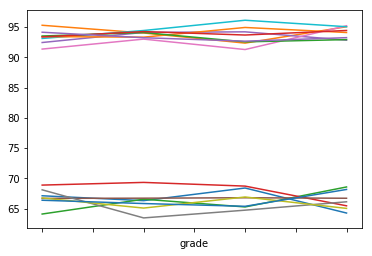

In [166]:
import matplotlib.pyplot as plt
% matplotlib inline
math_passing_school.transpose().plot(legend=False)

#### Reading Pass Rate by Grade, School

In [167]:
reading_passing_school_grade = df.groupby(['school', 'grade'])['reading_pass'].value_counts(normalize=True)
#use unstack command to convert the leveled info into a new df with columns of pass and fail, only keep pass column
reading_passing_school = reading_passing_school_grade.unstack(level=-1)['pass']*100
#use unstack command again on the pass data to get grade levels into columns
reading_passing_school = reading_passing_school.unstack(level=-1)

#reorder columns
reading_passing_school = reading_passing_school[['9th', '10th', '11th', '12th']]
#provide temporary formatting on the test score means for the output
reading_passing_school.applymap('{:.2f}%'.format) 

grade,9th,10th,11th,12th
school,,,,
Bailey High School,82.17%,83.54%,80.58%,81.32%
Cabrera High School,96.78%,97.42%,97.10%,96.86%
Figueroa High School,81.54%,81.26%,78.14%,81.96%
Ford High School,79.59%,79.10%,79.97%,78.29%
Griffin High School,96.09%,97.29%,97.51%,97.95%
Hernandez High School,81.11%,80.68%,81.71%,79.74%
Holden High School,94.49%,96.49%,96.12%,98.80%
Huang High School,81.28%,82.14%,80.58%,81.20%
Johnson High School,81.86%,81.50%,79.63%,81.94%


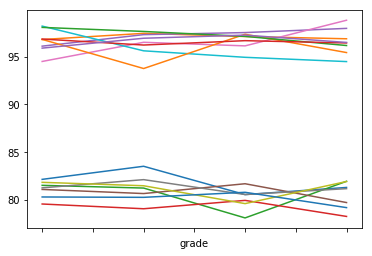

In [168]:
reading_passing_school.transpose().plot(legend=False)

#### random graphing practice

In [169]:
df_school_size_summ

,# of Schools,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Size,,,,,,
Small (<1000),2,83.821598,83.929843,93.550225,96.099437,94.824831
Medium (1000-2500),6,83.357937,83.885280,93.644365,96.748840,95.196603
Large (>2500),7,76.956733,80.966636,66.548453,80.799062,73.673757


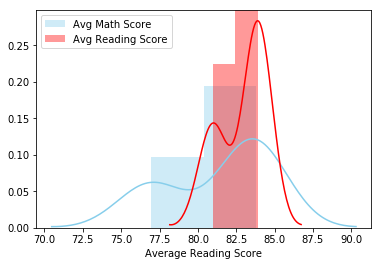

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 
# Method 1: on the same Axis
sns.distplot( df_school_size_summ["Average Math Score"] , color="skyblue", label="Avg Math Score")
sns.distplot( df_school_size_summ["Average Reading Score"] , color="red", label="Avg Reading Score")
plt.legend();


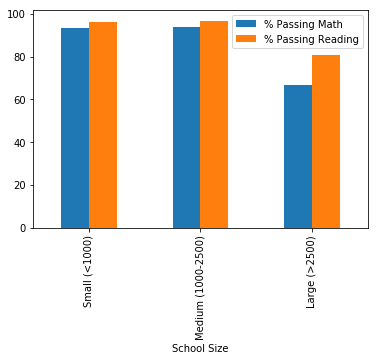

In [171]:
df_school_size_summ[['% Passing Math', '% Passing Reading']].plot(kind='bar')